<a href="https://colab.research.google.com/github/Did-Mas/RadonTransform/blob/main/RadonTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from skimage.data import shepp_logan_phantom
from skimage.transform import rotate, iradon
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

(400, 400)


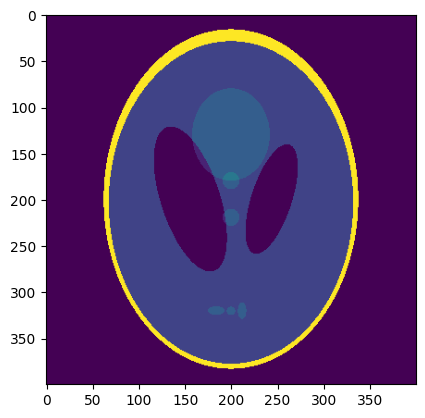

In [149]:
phantom = shepp_logan_phantom()
print(phantom.shape)
plt.imshow(phantom)

In [150]:
thetas = np.arange(0, 180, 1)
ps = np.zeros((len(thetas), phantom.shape[0]))
images = []

for i, theta in enumerate(thetas):
  rotated_phantom = rotate(phantom, theta)
  images.append(rotated_phantom)

  res = np.sum(rotated_phantom, axis=1)
  ps[i]=res

In [153]:
def update_sinogram_creation(angle_idx):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Panel 1: Rotated image (grayscale)
    ax1.imshow(images[angle_idx], cmap='gray')
    ax1.set_title(f'Rotated Image ({thetas[angle_idx]:.1f} degrees)')
    ax1.axis('off')

    # Panel 2: Projection (colored like sinogram)
    # We need a colormap and normalization similar to the sinogram
    cmap = plt.cm.viridis # Or any colormap used for the sinogram
    norm = plt.Normalize(vmin=ps.min(), vmax=ps.max()) # Normalize based on the full sinogram range
    ax2.plot(ps[angle_idx], np.arange(phantom.shape[1]))
    ax2.invert_yaxis() # Invert y-axis to match image orientation
    ax2.set_title('Projection')
    ax2.set_xlabel('Projection Value')
    ax2.set_ylabel('Projection Index')


    # Panel 3: Appearing sinogram
    ax3.imshow(ps[:angle_idx+1, :].T, cmap='viridis', aspect='auto',
               extent=[thetas[0], thetas[angle_idx], phantom.shape[1], 0],
               vmin=ps.min(), vmax=ps.max())
    ax3.set_title('Sinogram')
    ax3.set_xlabel('Theta (degrees)')
    ax3.set_ylabel('Projection Index')
    ax3.set_xlim(thetas[0], thetas[-1]) # Set initial x-axis limit to full thetas range


    plt.tight_layout()
    plt.show()

interact(update_sinogram_creation, angle_idx=IntSlider(min=0, max=len(thetas)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='angle_idx', max=179), Output()), _dom_classes=('widget-i…

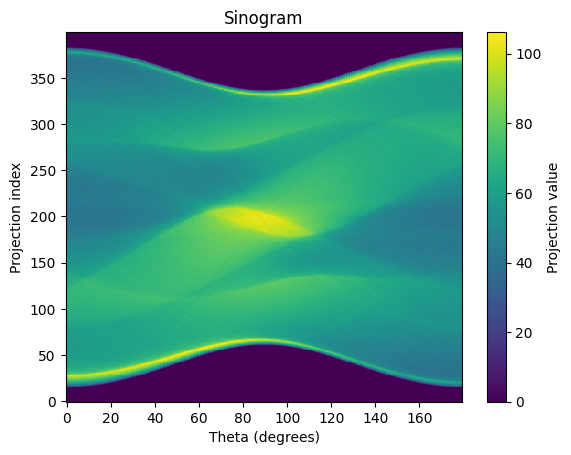

In [152]:
plt.pcolor(thetas, np.arange(phantom.shape[1]), ps.T, shading="auto")
plt.xlabel("Theta (degrees)")
plt.ylabel("Projection index")
plt.colorbar(label="Projection value")
plt.title("Sinogram")
plt.show()